# 1.0 Purpose
The purpose of this notebook is to create a Multi-Layer Perceptron (MLP) Neural Network using the Sequential API from TensorFlow for prediction on the fashion mnist dataset.

# 2.0 Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.5.0'

# 3.0 Import Fashion MNIST data

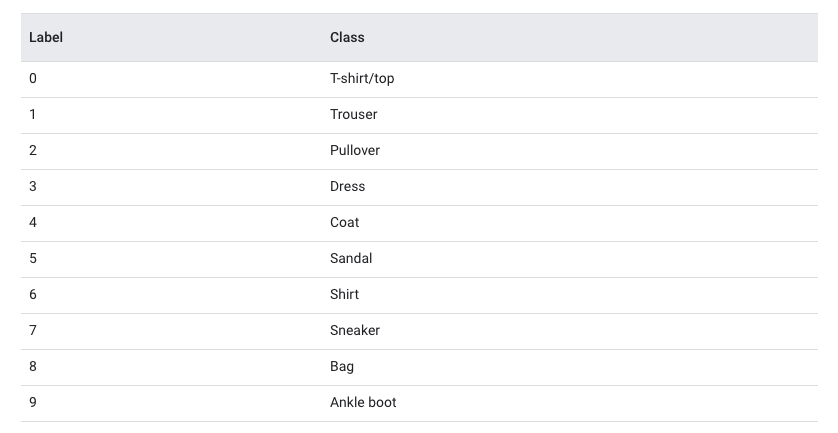

In [3]:
dict_labels={0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# 4.0 Preprocess Data

In [6]:
x_train[0] #notice that values are in range 0, 255.  We should normalize them

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
x_train=x_train/255.0 #normalize between 0 and 1
x_test=x_test/255.0 #normalize between 0 and 1

(<matplotlib.image.AxesImage at 0x7faa0299b2d0>, (28, 28))

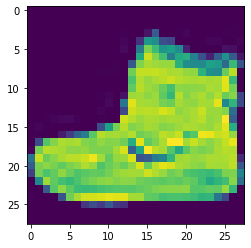

In [8]:
plt.imshow(x_train[0]), x_train[0].shape

In [9]:
dict_labels.get(y_train[0])

'Ankle boot'

# 5.0 Create MLP Sequential Model

## 5.0.0 myCallback 

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

In [11]:
callbacks=myCallback()

## 5.0.1 MLP, 1 hidden layer, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%, epochs=5

In [12]:
model1=tf.keras.Sequential()

In [13]:
input_shape=x_train[0].shape
input_shape

(28, 28)

In [14]:
model1.add(tf.keras.layers.Flatten(input_shape=input_shape))
model1.add(tf.keras.layers.Dense(128, activation = 'relu'))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
model1.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3378 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8919
CPU times: user 28.2 s, sys: 2.27 s, total: 30.4 s
Wall time: 23.8 s


In [17]:
y_pred=model1.predict(x_test)

In [18]:
y_pred[0]

array([3.3926397e-05, 1.6125283e-07, 1.6778870e-07, 3.1439865e-07,
       1.4546654e-07, 1.5213300e-02, 1.7478415e-06, 2.4507169e-02,
       1.5360059e-04, 9.6008945e-01], dtype=float32)

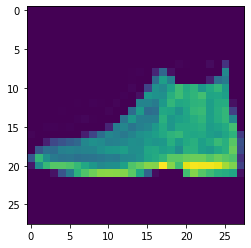

In [19]:
plt.imshow(np.squeeze(x_test[0]))

In [20]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '96.01%')

In [21]:
model1.save('model1') #save model

INFO:tensorflow:Assets written to: model1/assets


In [22]:
model1=tf.keras.models.load_model('model1') #load model

## 5.0.2 MLP, 2 hidden layers, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%,epochs=5

In [23]:
model2=tf.keras.Sequential()

In [24]:
input_shape=x_train[0].shape
input_shape

(28, 28)

In [25]:
model2.add(tf.keras.layers.Flatten(input_shape=input_shape))
model2.add(tf.keras.layers.Dense(128, activation = 'relu'))
model2.add(tf.keras.layers.Dense(128, activation = 'relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [27]:
%%time
model2.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4853 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3636 - accuracy: 0.8671
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3278 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3067 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.8919
CPU times: user 32.1 s, sys: 2.4 s, total: 34.5 s
Wall time: 27.3 s


In [28]:
y_pred=model2.predict(x_test)

In [29]:
y_pred[0]

array([1.6417990e-06, 1.6041814e-06, 2.2050943e-07, 4.1195719e-07,
       3.6007855e-06, 3.3224028e-02, 2.9267480e-06, 2.0958290e-02,
       5.6411392e-07, 9.4580674e-01], dtype=float32)

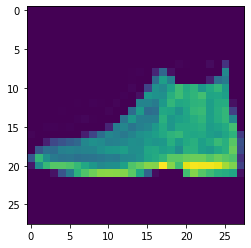

In [30]:
plt.imshow(np.squeeze(x_test[0]))

In [31]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '94.58%')

In [32]:
model2.save('model2') #save model

INFO:tensorflow:Assets written to: model2/assets


In [33]:
model2=tf.keras.models.load_model('model2') #load model

You can see that we got a more accurate model that took slightly longer to train when using 2 hidden layers intead of 1.  

## 5.0.3 MLP, 1 hidden layers, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%, epochs=20

In [34]:
model3=tf.keras.Sequential()

In [35]:
input_shape=x_train[0].shape
input_shape

(28, 28)

In [36]:
model3.add(tf.keras.layers.Flatten(input_shape=input_shape))
model3.add(tf.keras.layers.Dense(128, activation = 'relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
%%time
model3.fit(x_train,y_train,epochs=20,callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4964 - accuracy: 0.8252
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8644
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8775
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8853
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8906
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8945
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9002
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9028
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9073
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.239

In [39]:
y_pred=model3.predict(x_test)

In [40]:
y_pred[0]

array([3.7249572e-06, 1.8093183e-10, 1.6753651e-09, 6.7044675e-10,
       2.7577300e-09, 3.2030424e-04, 6.2169555e-08, 5.5249874e-02,
       3.1596329e-08, 9.4442600e-01], dtype=float32)

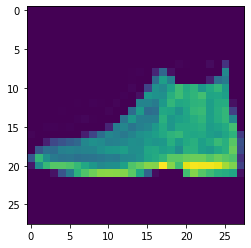

In [41]:
plt.imshow(np.squeeze(x_test[0]))

In [42]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '94.44%')

In [43]:
model3.save('model3') #save model

INFO:tensorflow:Assets written to: model3/assets


In [44]:
model3=tf.keras.models.load_model('model3') #load model

You can see that we got a more accurate model by training for more epochs, but it took a little bit longer.

# Zip Models

In [45]:
!zip -r /content/model1.zip /content/model1

  adding: content/model1/ (stored 0%)
  adding: content/model1/assets/ (stored 0%)
  adding: content/model1/saved_model.pb (deflated 86%)
  adding: content/model1/keras_metadata.pb (deflated 85%)
  adding: content/model1/variables/ (stored 0%)
  adding: content/model1/variables/variables.index (deflated 59%)
  adding: content/model1/variables/variables.data-00000-of-00001 (deflated 9%)


In [46]:
!zip -r /content/model2.zip /content/model2

  adding: content/model2/ (stored 0%)
  adding: content/model2/assets/ (stored 0%)
  adding: content/model2/saved_model.pb (deflated 87%)
  adding: content/model2/keras_metadata.pb (deflated 87%)
  adding: content/model2/variables/ (stored 0%)
  adding: content/model2/variables/variables.index (deflated 63%)
  adding: content/model2/variables/variables.data-00000-of-00001 (deflated 9%)


In [47]:
!zip -r /content/model3.zip /content/model3

  adding: content/model3/ (stored 0%)
  adding: content/model3/assets/ (stored 0%)
  adding: content/model3/saved_model.pb (deflated 86%)
  adding: content/model3/keras_metadata.pb (deflated 85%)
  adding: content/model3/variables/ (stored 0%)
  adding: content/model3/variables/variables.index (deflated 59%)
  adding: content/model3/variables/variables.data-00000-of-00001 (deflated 8%)


# Install **rclone**
This is so you can save your checkpoints weights to your actual google drive for restoration.

In [48]:
! curl https://rclone.org/install.sh | sudo bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4491  100  4491    0     0   8441      0 --:--:-- --:--:-- --:--:--  8441
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0     37      0 --:--:-- --:--:-- --:--:--    37
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.8M  100 13.8M    0     0  10.8M      0  0:00:01  0:00:01 --:--:-- 10.8M
Archive:  rclone-current-linux-amd64.zip
   creating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/
  inflating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/README.txt  [text]  
  inflating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/rclone.1  [text]  
  inflating:

You want to create a remote configuration with rclone.  Use the default recommendations.

In [49]:
!rclone config

2021/06/05 23:54:43 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found - make a new one
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n
name> remote
Type of storage to configure.
Enter a string value. Press Enter for the default ("").
Choose a number from below, or type in your own value
 1 / 1Fichier
   \ "fichier"
 2 / Alias for an existing remote
   \ "alias"
 3 / Amazon Drive
   \ "amazon cloud drive"
 4 / Amazon S3 Compliant Storage Providers including AWS, Alibaba, Ceph, Digital Ocean, Dreamhost, IBM COS, Minio, and Tencent COS
   \ "s3"
 5 / Backblaze B2
   \ "b2"
 6 / Box
   \ "box"
 7 / Cache a remote
   \ "cache"
 8 / Citrix Sharefile
   \ "sharefile"
 9 / Compress a remote
   \ "compress"
10 / Dropbox
   \ "dropbox"
11 / Encrypt/Decrypt a remote
   \ "crypt"
12 / Enterprise File Fabric
   \ "filefabric"
13 / FTP Connection
   \ "ftp"
14 / Google Cloud Storage (this is not Google Drive)
   \ "google cloud sto

# Copy Content to **Google Drive** with **rclone**
Try to copy exisiting weights to a future directory to ensure rclone is configured right

This line tests the ability to copy known weights to a directory on you **Google Drive** with **rclone**

In [50]:
!rclone copy "/content/"  remote:"/Colab_Notebooks/GitHub/TensorFlow_Examples/Basics/Wk2/content"